# Análisis de los 25 retailers más grandes de Estados Unidos

In [1]:
# Importar librerías aquí
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from colors import *

In [2]:
# Importar datos aquí
df = pd.read_csv('largest_us_retailers.csv')
df

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores
5,CVS incl. Target,77792,9813.0,8.825959,0.255662,Drug Stores
6,Amazon,71687,NaN,NaN,NaN,Electronic/Mail Order
7,Target,71208,1772.0,39.982033,-0.010056,Supercenters
8,Lowe's,60311,1828.0,33.311792,0.019520,Home Improvement
9,Albertsons,56829,2326.0,23.877731,-0.044371,Grocery


## I. Preguntas del negocio

### 1. ¿Cuál es el promedio de ventas sin contar a la compañía dominante?

In [3]:
#Ordeno la lista para detectar el que más vendió
df_sorted = df.sort_values('Sales',ascending=0)

df_mean_sales = df_sorted[1:]['Sales'].mean()

print(FG_BLUE)
print('Promedio de ventas sin  Walmart: %i USD'%int(df_mean_sales) )



Promedio de ventas sin  Walmart: 46602 USD


### 2. ¿Cuánto dinero en ventas generó la mayoría de las compañías?

In [4]:
minval = df_sorted.quantile(0)
Q1 = df_sorted.quantile(0.25)
median = Q1 = df_sorted.quantile(0.50)
Q3 = df_sorted.quantile(0.75)
maxval = df_sorted.quantile(1)

print(minval,Q1,median,Q3, maxval)


Sales                 16592.000000
Stores                  231.000000
Sales/Avg. Store          1.563919
Store Count Growth       -0.059515
Name: 0, dtype: float64 Sales                 34980.000000
Stores                 1828.000000
Sales/Avg. Store         25.997733
Store Count Growth        0.019520
Name: 0.5, dtype: float64 Sales                 34980.000000
Stores                 1828.000000
Sales/Avg. Store         25.997733
Store Count Growth        0.019520
Name: 0.5, dtype: float64 Sales                 71687.000000
Stores                 4242.000000
Sales/Avg. Store         41.358955
Store Count Growth        0.078934
Name: 0.75, dtype: float64 Sales                 658119.000000
Stores                 14250.000000
Sales/Avg. Store         187.795620
Store Count Growth         0.255662
Name: 1, dtype: float64


In [5]:
from colors import *

walmart = df_sorted.iloc[0]['Sales'] #ventas de walmart
all_no_walmart = df_sorted[1:]['Sales'].sum() #ventas de todas menos walmart
all_companies = all_no_walmart + walmart #ventas totales

print(FG_BLUE)
print('Ventas de Walmart: %i USD'%int(walmart) )
print(FG_RED)
print('Ventas de todas las compañias (menos Walmart): %i USD'%int(all_no_walmart))
print(FG_GREEN)
print('Ventas de todas las compañia: %i USD'%int(all_companies))


Ventas de Walmart: 658119 USD

Ventas de todas las compañias (menos Walmart): 1118458 USD

Ventas de todas las compañia: 1776577 USD


### Ventas de todas las compañias menos Walmart

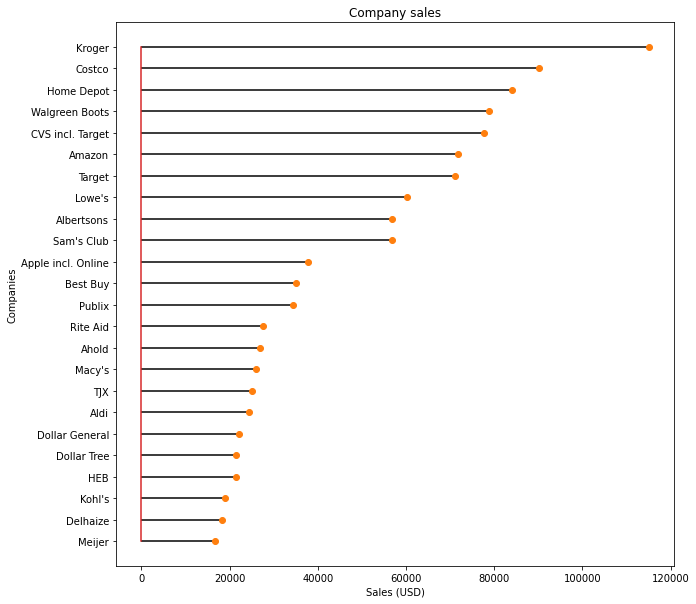

In [6]:
companies = df_sorted['Company'][1:][::-1]
sales = df_sorted['Sales'][1:][::-1]

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot()
plt.stem(sales, orientation='horizontal',linefmt='k',markerfmt='C1o')
ax.set_yticks([i for i in range(len(companies))])
ax.set_yticklabels(companies)
plt.ylabel('Companies')
plt.xlabel('Sales (USD)')

plt.title('Company sales')
plt.show()

Text(0.5, 0, 'Sales (USD)')

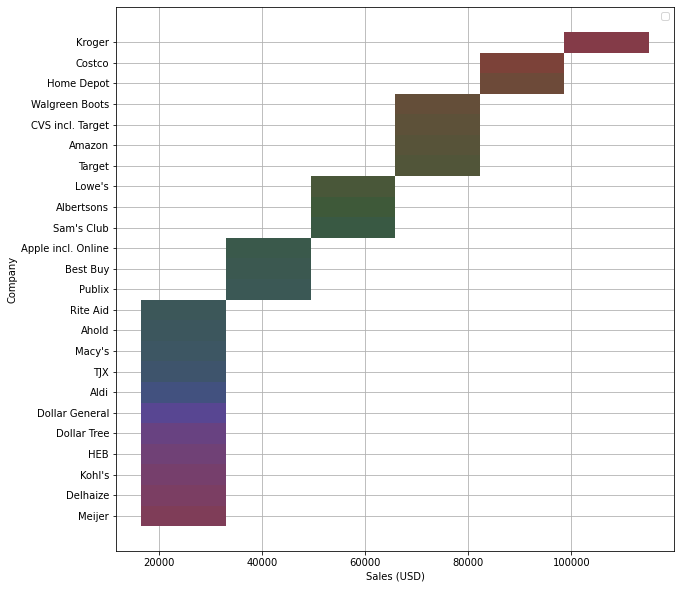

In [7]:
#Sin Walmart
fig = plt.figure(figsize=(10,10))
plt.grid(axis='both',zorder=0)
sns.histplot(df_sorted[1:], x = 'Sales', y='Company',hue='Company',zorder=10)
plt.legend('off')

plt.xlabel('Sales (USD)')

## Las ventas de Walmart es equivalente a las ventas de las siguientes 15 compañías.

Text(0.5, 1.0, 'Company sales')

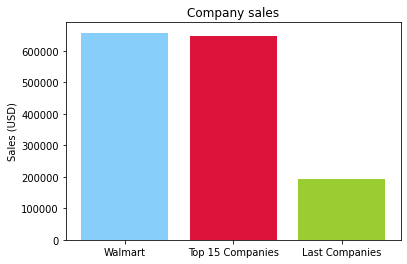

In [8]:
#Comparativo

acum = df_sorted[1:-16]['Sales'].sum() #Suman lo mismo que walmart
walmart = df_sorted.iloc[0]['Sales']
resto = df_sorted[16:]['Sales'].sum()

comp = [walmart,acum,resto]

plt.bar(['Walmart','Top 15 Companies','Last Companies'],comp,color=['lightskyblue','crimson','yellowgreen'])

plt.ylabel('Sales (USD)')

plt.title('Company sales')


### 3. ¿Cuántas tiendas tiene la mayoría de las compañías?

In [9]:
df_sorted

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores
5,CVS incl. Target,77792,9813.0,8.825959,0.255662,Drug Stores
6,Amazon,71687,NaN,NaN,NaN,Electronic/Mail Order
7,Target,71208,1772.0,39.982033,-0.010056,Supercenters
8,Lowe's,60311,1828.0,33.311792,0.019520,Home Improvement
9,Albertsons,56829,2326.0,23.877731,-0.044371,Grocery


## Walmart no es la compañía con más tiendas

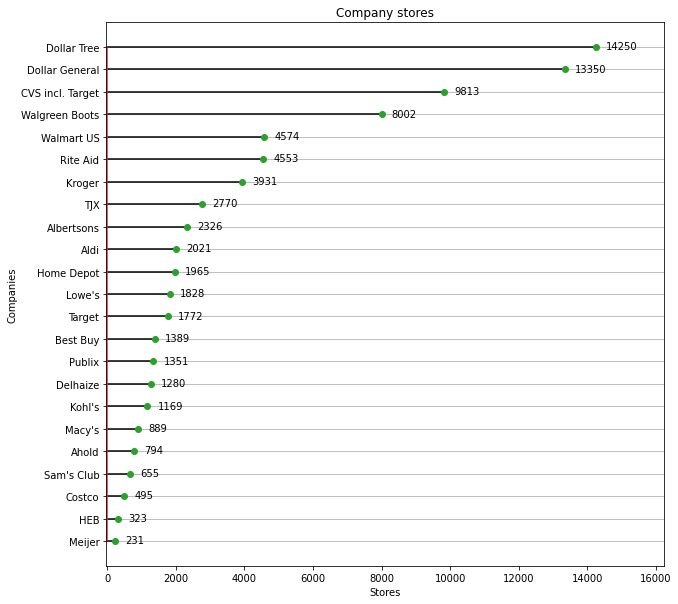

In [10]:
df_store_sorted = df_sorted.sort_values('Stores')
df_store_sorted = df_store_sorted[df_store_sorted['Stores'].notna()]

companies =df_store_sorted['Company']
stores = df_store_sorted['Stores']

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot()
plt.stem(stores, orientation='horizontal',linefmt='k',markerfmt='C2o')
ax.set_yticks([i for i in range(len(companies))])
ax.set_yticklabels(companies)
plt.ylabel('Companies')
plt.xlabel('Stores')
plt.grid(axis='y')

y_range = np.arange(1, len(df_store_sorted.index) + 1)

for (_, row), y in zip(df_store_sorted.iterrows(), y_range):
    
    plt.annotate(int(row['Stores']), (row["Stores"]+300, y-1.1))

plt.xlim(-20, max(stores)+ 2000)

plt.title('Company stores')

plt.show()

### 4. ¿La cantidad de tiendas está relacionada con la cantidad de ventas? Es decir, ¿si una empresa tiene más tiendas tendrá más dinero de ventas?

### Ventas vs Tiendas(incluyendo Walmart)


"\nWalmart is the top one in sales but doesn't have too much stores as others\n"

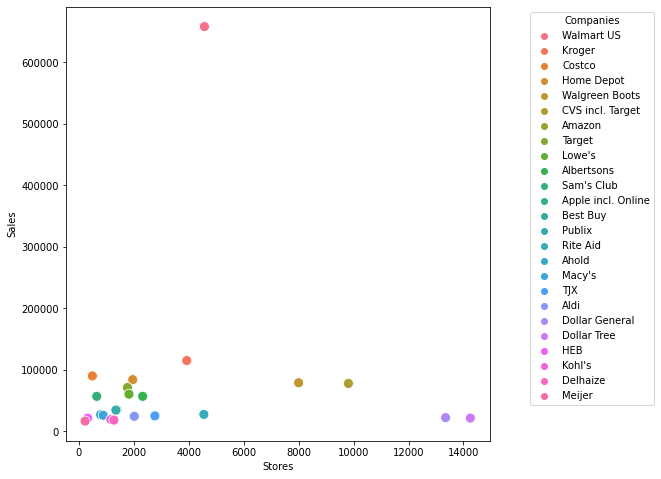

In [11]:
#Las compañias que más venden
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot()
jp = sns.scatterplot(data=df_sorted,x='Stores',
                    y ='Sales',hue='Company',s=100)
plt.tight_layout()
#plt.legend('off')

plt.legend(loc='upper right', title='Companies',bbox_to_anchor=(1.4, 1))


"""
Walmart is the top one in sales but doesn't have too much stores as others
"""

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


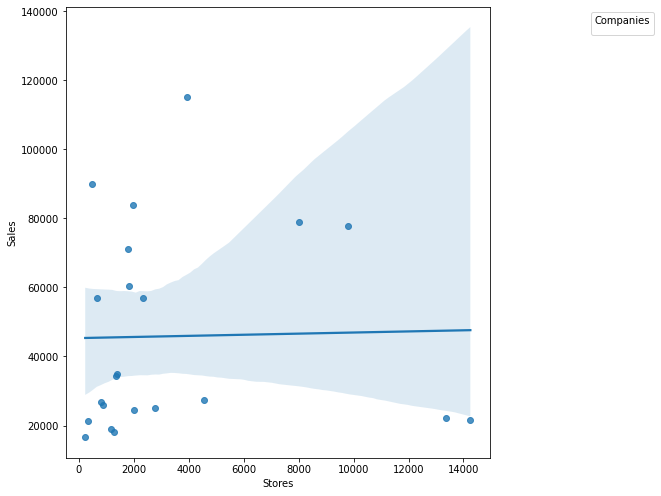

In [12]:
#Las compañias que más venden
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot()
jp = sns.regplot(data=df_sorted[1:],x='Stores',
                    y ='Sales')
plt.tight_layout()
#plt.legend('off')

plt.legend(loc='upper right', title='Companies',bbox_to_anchor=(1.4, 1))



No hay buena correlación entre las ventas y las tiendas físicas evaluando todas las compañias por igual

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


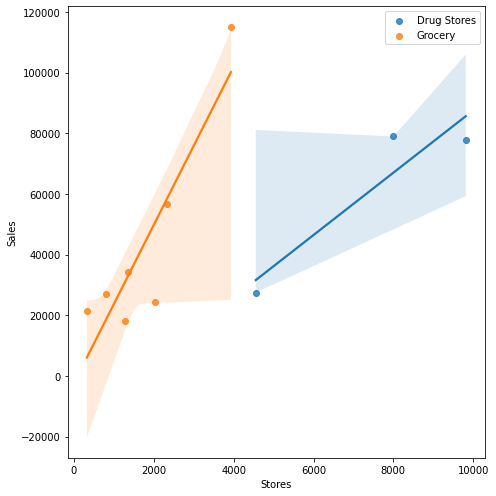

In [13]:
#Las compañias que más venden


fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot()
legends= []
for category in set(df_sorted[1:]['Category']):
    df_category = df_sorted[1:][df_sorted['Category']==category]
    
    if len(df_category)>2:
        legends.append(category)
        jp = sns.regplot(data=df_category,x='Stores',
                        y ='Sales',label=category)
    
plt.legend()
plt.tight_layout()
    #plt.legend('off')

plt.show()


Si se observa una correlación entre las tiendas físicas y las ventas entre compañías de la misma categoría.

### 5. ¿Cuál es el rango que existe entre las ventas?

In [14]:

companies = df_sorted['Company']
sales = df_sorted['Sales']

categories = set(df_sorted['Category'][df_sorted['Category'].notna()])

rango = sales.iloc[0]-sales.iloc[-1]

print(FG_BLUE)
print('El rango de ventas de todas las compañias: %i USD'%int(rango))

rango = sales.iloc[1]-sales.iloc[-1]

print('El rango para todas las compañias (sin Walmart) is: %i USD'%int(rango))


print('--------------------------------')
print('        Rango por categoría     ')
print('--------------------------------')
for category in categories:
    df_category = df_sorted[df_sorted['Category']==category]
    
    if len(df_category)>1:
        print(FG_BLUE)
        rango = df_category['Sales'].iloc[0] - df_category['Sales'].iloc[-1]
        print('El rango por categoría %s is %i USD'%(category,int(rango)))
    else:
        print(FG_RED)
        print('La categoría %s tiene sólo una compañia'%category)


El rango de ventas de todas las compañias: 641527 USD
El rango para todas las compañias (sin Walmart) is: 98445 USD
--------------------------------
        Rango por categoría     
--------------------------------

La categoría Apparel tiene sólo una compañia

El rango por categoría Supercenters is 641527 USD

La categoría Warehouse Clubs tiene sólo una compañia

El rango por categoría Home Improvement is 23665 USD

El rango por categoría Department Stores is 6968 USD

La categoría Electronics tiene sólo una compañia

La categoría Electronic/Mail Order tiene sólo una compañia

El rango por categoría Drug Stores is 51438 USD

La categoría Warehouse Club tiene sólo una compañia

El rango por categoría Dollar Stores is 770 USD

El rango por categoría Grocery is 96836 USD


### 6. ¿Cuáles son las 5 empresas que más tiendas físicas tienen? ¿Cuáles de ellas están dentro de las 5 empresas que más ventas tuvieron?

In [15]:
df_top_stores = df_sorted.sort_values('Stores')[df_sorted['Stores'].notna()][::-1][:5]
df_top_stores

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
20,Dollar Tree,21464,14250.0,1.563919,0.079627,Dollar Stores
19,Dollar General,22234,13350.0,1.768885,0.132412,Dollar Stores
5,CVS incl. Target,77792,9813.0,8.825959,0.255662,Drug Stores
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters


Top 5 empresas con mayor cantidad de tiendas físicas: 
$Dollar Tree$, $Dollar General$, $CVS incl. Target$, $Walgreen Boots$, $Walmart US$

In [16]:
df_top_sales = df_sorted[:5]

int_df = pd.merge(df_top_stores, df_top_sales, how ='inner', on =['Company', 'Sales','Stores'])

int_df

,Company,Sales,Stores,Sales/Avg. Store_x,Store Count Growth_x,Category_x,Sales/Avg. Store_y,Store Count Growth_y,Category_y
0,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores,9.810927,-0.010511,Drug Stores
1,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters,65.649725,0.012843,Supercenters


Walgreen Boots y Walmart son las únicas dos empresas que estan en el top de ventas y de tiendas físicas. De Walmart es esperable ya que rompe todos los esquemas empresariales

## II. Preguntas opcionales

### 7. ¿Qué categoría de compañía generó más ventas?

In [17]:
df_sorted.groupby('Category').sum().sort_values('Sales',ascending=False).index[0]

'Supercenters'

### 8. ¿Cuál es la compañía que en relación con su cantidad de tiendas físicas genera más ventas?

In [18]:
df_sales = df_sorted['Sales'][:]
df_stores = df_sorted['Stores'][:]

df_sales_by_store = df_sales / df_stores

df_sorted['Sales by store'] = df_sales_by_store

df_sorted.sort_values('Sales by store', ascending = False)

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category,Sales by store
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club,181.915152
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters,143.882597
10,Sam's Club,56828,655.0,87.293395,0.012365,Warehouse Clubs,86.760305
24,Meijer,16592,231.0,74.738739,0.084507,Supercenters,71.826840
21,HEB,21384,323.0,66.825000,0.018927,Grocery,66.204334
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement,42.735878
7,Target,71208,1772.0,39.982033,-0.010056,Supercenters,40.185102
15,Ahold,26903,794.0,34.446863,0.033854,Grocery,33.882872
8,Lowe's,60311,1828.0,33.311792,0.019520,Home Improvement,32.992888
16,Macy's,26028,889.0,30.442105,0.082826,Department Stores,29.277840


Sin contar las empresas que no tienen tiendas físicas ( Que serian las que mas dinero generan en función de sus tiendas, como Amazon ). La compañia que más dinero genera en función de sus tiendas físicas es Costco con una proporcion de ventas/tiendas de 181

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


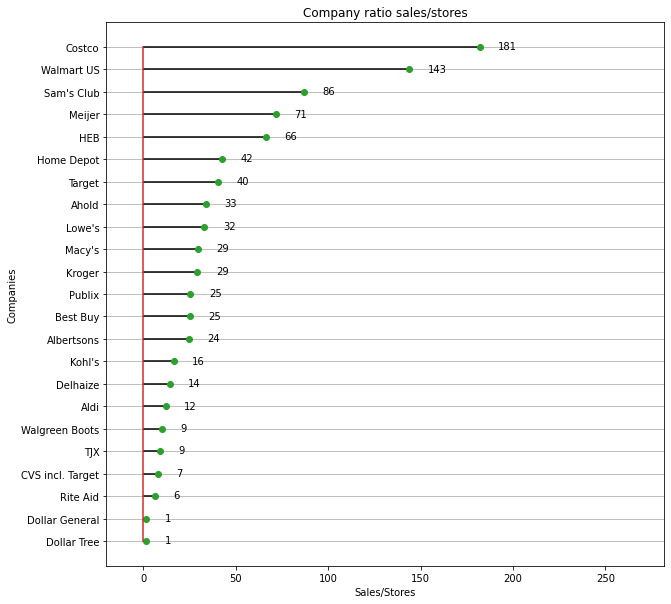

In [19]:
sales_by_store = df_sorted.sort_values('Sales by store')[df_sorted['Sales by store'].notna()]['Sales by store']
companies  =  df_sorted.sort_values('Sales by store')[df_sorted['Sales by store'].notna()]['Company']
df_sorted_salesbystore = df_sorted.sort_values('Sales by store')[df_sorted['Sales by store'].notna()]


fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot()

plt.stem(sales_by_store, orientation='horizontal',linefmt='k',markerfmt='C2o')
ax.set_yticks([i for i in range(len(companies))])
ax.set_yticklabels(companies)
plt.ylabel('Companies')
plt.xlabel('Sales/Stores')
plt.grid(axis='y')

y_range = np.arange(1, len(df_sorted_salesbystore.index) + 1)

for (_, row), y in zip(df_sorted_salesbystore.iterrows(), y_range):
    
    plt.annotate(int(row['Sales by store']), (row["Sales by store"]+10, y-1.1))

plt.xlim(-20, max(sales_by_store)+ 100)

plt.title('Company ratio sales/stores')

plt.show()

### 9. ¿Cuáles compañías venden de forma exclusivamente online? ¿Sus ventas destacan sobre las que también tienen tiendas físicas?

In [20]:
no_store_companies = df_sorted[df_sorted['Stores'].isna()]['Company']
no_store_companies

6                 Amazon
11    Apple incl. Online
Name: Company, dtype: object

In [21]:
for comp in no_store_companies:
    print("La compañia %s esta en la posición n°%i en ventas"%( comp ,df_sorted.index[df_sorted['Company']==comp][0]))

La compañia Amazon esta en la posición n°6 en ventas
La compañia Apple incl. Online esta en la posición n°11 en ventas


Tanto Amazon con Apple Online se ubican en posiciones altas del ranking de ventas.
En relación al resto tienen la ventaja de menores costos de mantenimiento de locales y personal aunque poseen mayores costos en servicios digitales que el resto.

## III. Tus propias preguntas

### 10. Pregunta

#### ¿Que categorias son las que mayor cantidad de tiendas físicas poseen en promedio?

In [22]:
df_category_means =  df_sorted[df_sorted['Stores'].notna()].groupby('Category').mean().sort_values('Stores', ascending = False)

df_category_means

,Sales,Stores,Sales/Avg. Store,Store Count Growth,Sales by store
Category,,,,,
Dollar Stores,21849.000000,13800.000000,1.666402,0.106019,1.585857
Drug Stores,61400.666667,7456.000000,8.220845,0.080477,7.942459
Apparel,25012.000000,2770.000000,9.369545,0.078241,9.029603
Supercenters,248639.666667,2192.333333,60.123499,0.029098,85.298180
Home Improvement,72143.500000,1896.500000,38.023835,0.009760,37.864383
Grocery,42452.000000,1718.000000,29.668370,0.022499,29.363661
Electronics,34980.000000,1389.000000,24.685956,-0.038754,25.183585
Department Stores,22544.000000,1029.000000,23.397801,0.044425,22.791187
Warehouse Clubs,56828.000000,655.000000,87.293395,0.012365,86.760305


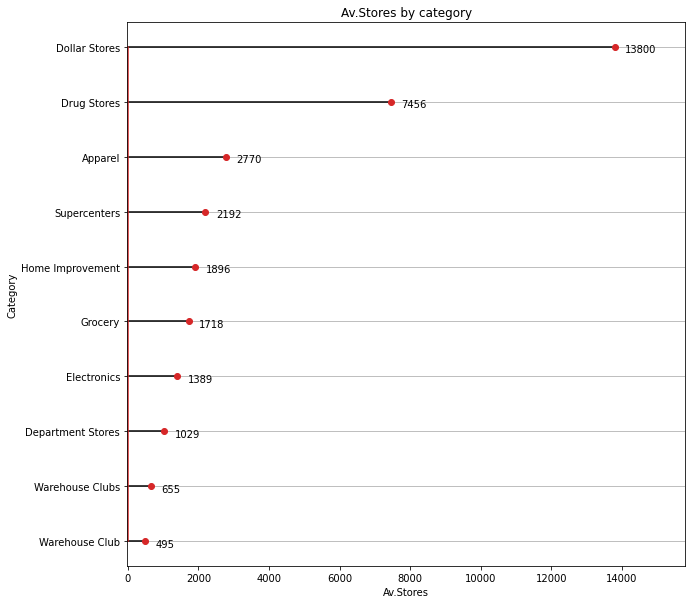

In [23]:
stores_by_category = df_category_means['Stores'][::-1]
category = df_category_means.index[::-1]


fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot()

plt.stem(stores_by_category, orientation='horizontal',linefmt='k',markerfmt='C3o')
ax.set_yticks([i for i in range(len(category))])
ax.set_yticklabels(category)
plt.ylabel('Category')
plt.xlabel('Av.Stores')
plt.grid(axis='y')

y_range = np.arange(1, len(category) + 1)

for stor, y in zip(stores_by_category, y_range):
    
    plt.annotate(int(stor), (stor+300, y-1.1))

plt.xlim(-20, max(stores_by_category)+ 2000)

plt.title('Av.Stores by category')

plt.show()

### 11. Pregunta

#### ¿Cual es la empresa que más creció en tiendas el último año? ¿Y en relación a sus ventas?

In [24]:
df_company_growth = df_sorted.sort_values('Store Count Growth', ascending=False)[df_sorted['Store Count Growth'].notna()]

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


#### La compañia que más creció en el año:

In [25]:
df_company_growth.iloc[0]

Company               CVS incl. Target
Sales                            77792
Stores                          9813.0
Sales/Avg. Store              8.825959
Store Count Growth            0.255662
Category                   Drug Stores
Sales by store                7.927443
Name: 5, dtype: object

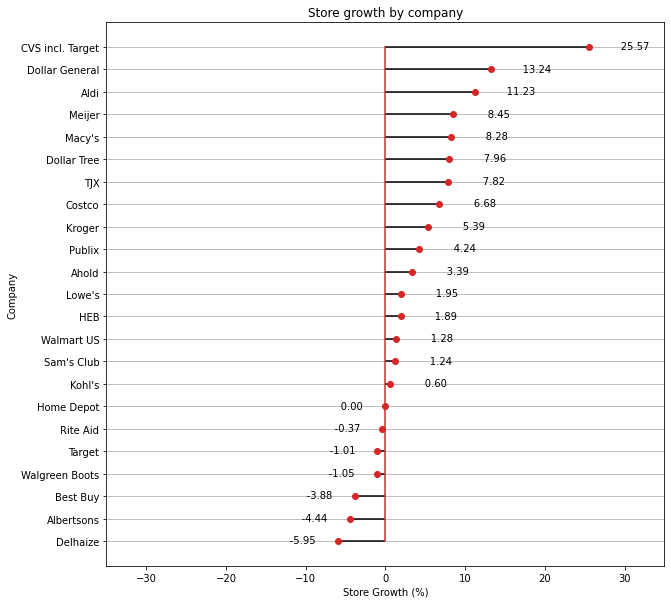

In [26]:
store_growth = df_company_growth['Store Count Growth'][::-1]*100
company = df_company_growth['Company'][::-1]

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot()

plt.stem(store_growth, orientation='horizontal',linefmt='k',markerfmt='C3o')
ax.set_yticks([i for i in range(len(company))])
ax.set_yticklabels(company)
plt.ylabel('Company')
plt.xlabel('Store Growth (%)')
plt.grid(axis='y')

y_range = np.arange(1, len(company) + 1)

for stor, y in zip(store_growth, y_range):
    
    x = stor +2 if stor >0 else stor-8
    
    plt.annotate("{:10.2f}".format(stor), (x, y-1.1))

plt.xlim(-35, 35)

plt.title('Store growth by company')

plt.show()

#### La compañia que más creció en función de sus ventas

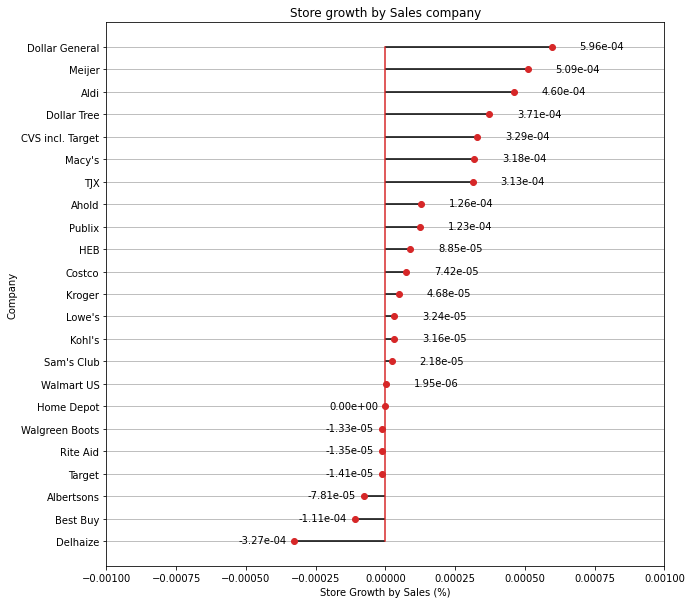

In [27]:
growth_by_sales = store_growth/sales
df_company_growth['Store Growth by Sales'] = growth_by_sales
df_company_growth = df_company_growth.sort_values('Store Growth by Sales',ascending=False)
sales = df_company_growth['Sales'][::1]
growth_by_sales = df_company_growth['Store Growth by Sales'][::-1]
company = df_company_growth['Company'][::-1]

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot()

plt.stem(growth_by_sales, orientation='horizontal',linefmt='k',markerfmt='C3o')
ax.set_yticks([i for i in range(len(company))])
ax.set_yticklabels(company)
plt.ylabel('Company')
plt.xlabel('Store Growth by Sales (%)')
plt.grid(axis='y')

y_range = np.arange(1, len(company) + 1)

for stor, y in zip(growth_by_sales, y_range):
    
    x = stor +0.0001 if stor >0 else stor-0.0002
    
    plt.annotate("{:.2e}".format(stor), (x, y-1.1))

plt.xlim(-0.001,0.001)


plt.title('Store growth by Sales company')

plt.show()

### 12. Pregunta

#### ¿Cuál es la empresa que más destaca sobre el resto?

#### Las compañias más destacadas son:
- Walmart por su nivel de ventas.
- Dollar General por la cantidad de tiendas.
- Dollar Tree por la cantidad de tiendas y el crecimiento anual.

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.


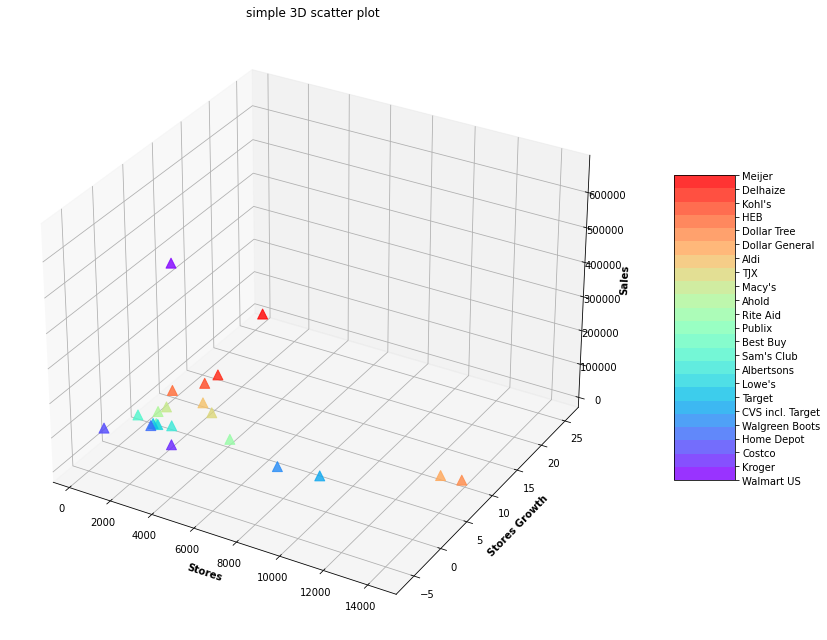

In [28]:
# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

sales = df_sorted[df_sorted['Stores'].notna()]['Sales']
stores = df_sorted[df_sorted['Stores'].notna()]['Stores']
stores_grwth = df_sorted[df_sorted['Stores'].notna()]['Store Count Growth']
companies = df_sorted[df_sorted['Stores'].notna()]['Company']

x, y,z =  stores, store_growth,sales

# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")

# Add x, y gridlines
ax.grid(b = True, color ='grey',
		linestyle ='-.', linewidth = 0.3,
		alpha = 0.2)


# Creating color map
my_cmap = plt.get_cmap('rainbow', len(sales))

# Creating plot
sctt = ax.scatter3D(x, y, z,
					alpha = 0.8,
					c = list(range(len(sales))),
					cmap = my_cmap,
                    s=100,
					marker ='^')

plt.title("simple 3D scatter plot")
ax.set_xlabel('Stores', fontweight ='bold')
ax.set_ylabel('Stores Growth', fontweight ='bold')
ax.set_zlabel('Sales', fontweight ='bold')
cb = fig.colorbar(sctt, ax = ax,ticks =list(range(len(sales))) ,  shrink = 0.5, aspect = 5)
cb.ax.set_yticklabels(companies)

plt.tight_layout()
# show plot
plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a0e8cbdf-bb09-4f7a-b16e-58cf07006ed1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>